##数据探探
首先看看数据长啥样

In [56]:
import pandas as pd;
import numpy as np
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
train_df=pd.read_csv("./input_data/train.csv")
test_df=pd.read_csv("./input_data/test.csv")

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [44]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


数据拼接一把

In [47]:
test_df["casual"]=0;
test_df["registered"]=0;
test_df["count"]=0;
test_df["traintest"]='test';
train_df["traintest"]='train';

In [48]:
all_df=pd.concat((train_df,test_df))

In [51]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
traintest     17379 non-null object
dtypes: float64(3), int64(8), object(2)
memory usage: 1.9+ MB


In [52]:
all_df["date"] = all_df.datetime.apply(lambda x : x.split()[0])

In [57]:
all_df["month"] = all_df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [62]:
all_df["monthnum"] = all_df.datetime.apply(lambda x : int(x.split()[0].split('-')[1]))

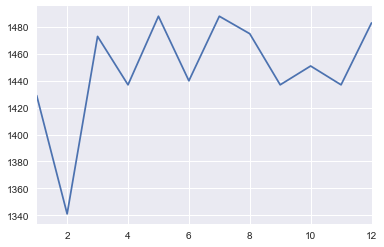

In [75]:
all_df.monthnum.value_counts().sort_index().plot(kind='line')

In [81]:
all_df["daynum"]=all_df.datetime.apply(lambda x : int(x.split()[0].split('-')[2]))

In [91]:
all_df["hour"] = all_df.datetime.apply(lambda x : int(x.split()[1].split(":")[0]))

In [88]:
all_df["weekday"] = all_df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [93]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
traintest     17379 non-null object
date          17379 non-null object
monthnum      17379 non-null int64
daynum        17379 non-null int64
hour          17379 non-null int64
weekday       17379 non-null object
dtypes: float64(3), int64(11), object(4)
memory usage: 3.1+ MB


根据小时进行切分

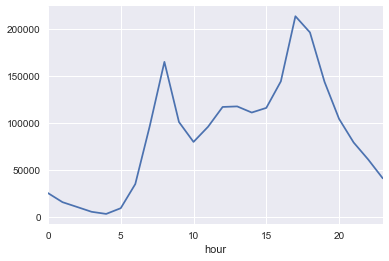

In [96]:
all_df.groupby('hour').sum()['count'].sort_index().plot(kind='line')

In [102]:
def hour_section(hour):
    if hour>=0 and hour<=6:
        return 0
    elif hour>=7 and hour<=10:
        return 1
    elif hour>=11 and hour<=15:
        return 2
    elif hour>=16 and hour<=20:
        return 3
    else :return 4

In [103]:
all_df["hour_section"]=all_df.hour.apply(hour_section)

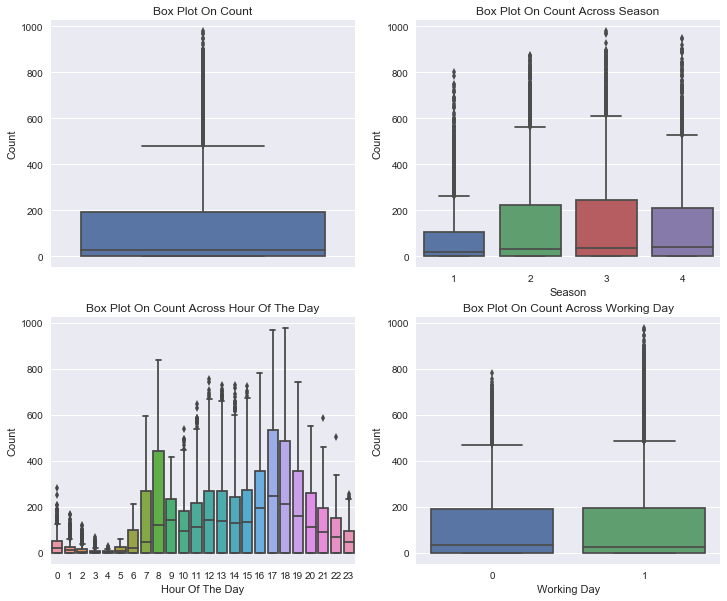

In [114]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=all_df,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=all_df,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=all_df,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=all_df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

[<matplotlib.text.Text at 0xcbbbeb8>, <matplotlib.text.Text at 0xc9c3160>]